# 1. 숫자인식 single-layer Perceptron 설계

### 1) 8x6 숫자 디자인

In [364]:
import numpy as np

num_set = [[[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 0
           
           [[0,0,0,1,0,0],
            [0,0,1,1,0,0],
            [0,1,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,1,1,1,1,1]],# 1
           
           [[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,0,0,0,1,0],
            [0,0,0,1,0,0],
            [0,0,1,0,0,0],
            [0,1,0,0,0,0],
            [1,1,1,1,1,1]],# 2
           
           [[0,0,0,0,0,0],
            [0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [0,0,0,0,0,1],
            [0,0,1,1,1,0],
            [0,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 3
           
           [[0,0,0,0,0,0],
            [0,0,0,0,1,0],
            [0,0,0,1,1,0],
            [0,0,1,0,1,0],
            [0,1,0,0,1,0],
            [1,1,1,1,1,1],
            [0,0,0,0,1,0],
            [0,0,0,0,1,0]],# 4
           
           [[1,1,1,1,1,1],
            [1,0,0,0,0,0],
            [1,0,0,0,0,0],
            [1,1,1,1,1,0],
            [0,0,0,0,0,1],
            [0,0,0,0,0,1],
            [0,0,0,0,0,1],
            [1,1,1,1,1,0]],# 5
           
           [[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,0],
            [1,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 6
           
           [[0,1,1,1,1,1],
            [0,0,0,0,0,1],
            [0,0,0,0,0,1],
            [0,0,0,0,1,0],
            [0,0,0,0,1,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0]],# 7
           
           [[0,0,0,0,0,0],
            [0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 8
           
           [[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,1],
            [0,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]]]# 9

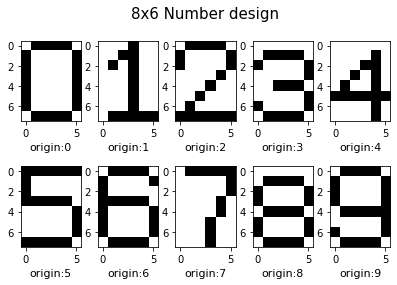

In [365]:
from PIL import Image
import matplotlib.pyplot as plt
w, h = 6, 8
for i,j in zip(num_set, range(1,11)):
    img = Image.fromarray(np.invert(np.array(i).astype(bool)))
    plt.subplot(2,5,j)
    plt.xlabel('origin:'+str(j-1),fontsize=11,loc='center')
    plt.imshow(img)
plt.suptitle('8x6 Number design',fontsize=15)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.savefig('Number.png',dpi=300)

### 2) Desired Output 설정

In [366]:
desired_output = np.array([[-1,-1,-1,-1],
                           [-1,-1,-1, 1],
                           [-1,-1, 1,-1],
                           [-1,-1, 1, 1],
                           [-1, 1,-1,-1],
                           [-1, 1,-1, 1],
                           [-1, 1, 1,-1],
                           [-1, 1, 1, 1],
                           [ 1,-1,-1,-1],
                           [ 1,-1,-1, 1]])

### 3) Learning phase

In [367]:
def activation(x):
    return (1 if x>=0 else -1)

activation = np.vectorize(activation)

weight = np.random.randn(4,48)

n = 1
while True:
    check = 0
    for i in range(10):
        x = np.ravel(num_set[i])
        NET = np.dot(x,weight.T)
        NET = activation(NET)
        for y,d,j in zip(NET,desired_output[i],range(4)):
            if d != y:
                weight[j] = weight[j]+(n*(d-y)*x)
                check = 1
    if check==0:
        break

### 4) Recognition phase (Noise data)

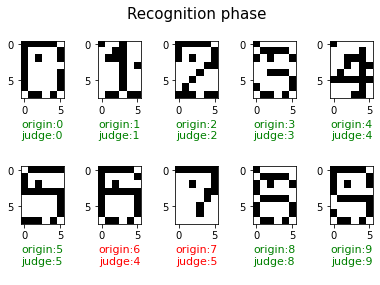

In [368]:
noise_num_set = np.copy(np.array(num_set))

for i in range(10):
    np.random.seed(2)
    random_noise_num = np.random.randint(4,7,size=1)
    random_noise_w = np.random.randint(w, size=random_noise_num)
    random_noise_h = np.random.randint(h, size=random_noise_num)
    for x,y in zip(random_noise_w,random_noise_h):
        noise_num_set[i][y][x] = not noise_num_set[i][y][x]

recognition = []
for i in range(10):
    NET = np.dot(np.ravel(noise_num_set[i]),weight.T)
    NET = activation(result)
    for j in range(10):
        if np.array_equal(NET,desired_output[j]):
            recognition.append(j)
            break
        elif j==9:
            recognition.append(np.nan)
            
for i in range(10):
    img = Image.fromarray(np.invert(noise_num_set[i].astype(bool)))
    plt.subplot(2,5,i+1)
    if i == recognition[i]:
        plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition[i])+'\n',fontsize=11,loc='center',color='green')
    else:
        plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition[i])+'\n',fontsize=11,loc='center',color='red')
    plt.imshow(img)
plt.suptitle('Recognition phase',fontsize=15)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.savefig('Recognition.png',dpi=300)

### 5) Accuracy measurement

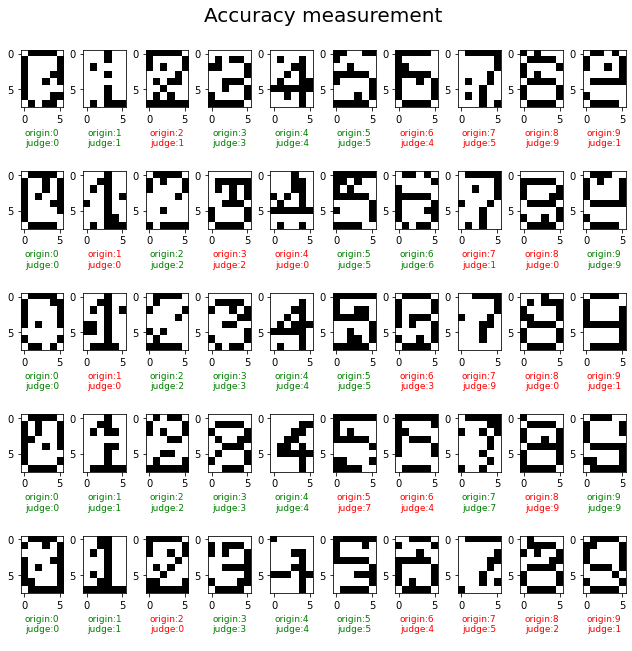

In [369]:
noise_num_temp = np.copy(np.array(num_set))
noise_num_dummy = np.empty((5,10,8,6))
for i in range(5):
    noise_num_dummy[i] = np.copy(noise_num_temp)
    for j in range(10):
        random_noise_num = np.random.randint(4,7,size=1)
        random_noise_w = np.random.randint(w, size=random_noise_num)
        random_noise_h = np.random.randint(h, size=random_noise_num)
        for x,y in zip(random_noise_w,random_noise_h):
            noise_num_dummy[i][j][y][x] = not noise_num_dummy[i][j][y][x]
            
recognition_dummy = np.empty((10,5))

for i in range(10):
    for j in range(5):
        result = np.dot(np.ravel(noise_num_dummy[j][i]),weight.T)
        result = activation(result)
        for k in range(10):
            if np.array_equal(result,desired_output[k]):
                recognition_dummy[i][j] = k
                break
            elif j==9:
                recognition_dummy[i][j] = np.nan
recognition_dummy = recognition_dummy.astype(int)

correct_num = 0

plt.figure(figsize=(9,9))
for i in range(10):
    for j in range(5):
        img = Image.fromarray(np.invert(noise_num_dummy[j][i].astype(bool)))
        plt.subplot(5,10,j*10+i+1)
        if i == recognition_dummy[i][j]:
            plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition_dummy[i][j])+'\n',fontsize=9,loc='center',color='green')
            correct_num+=1
        else:
            plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition_dummy[i][j])+'\n',fontsize=9,loc='center',color='red')
        plt.imshow(img)
plt.suptitle('Accuracy measurement',fontsize=20,y=1.0)
plt.subplots_adjust(top=0.3,wspace=None)
plt.tight_layout()
plt.savefig('Accuracy.png',dpi=300)

In [370]:
print('Accuracy :'+str(correct_num/50*100)+'%')

Accuracy :54.0%
